### 데코레이터

- 데코레이터는 호출 가능 객체(함수, 메서드, 클래스)를 영구적으로 수정하지 않고도 그 동작을 확장, 수정할 수 있게 함
- 기존 클래스나 함수의 동작에 일반적인 기능을 덧붙이고 싶을 때 유용
    - 로그 남기기
    - 접근 제어와 인증 시행
    - 계측 및 시간 측정
    - 비율 제한
    - 캐싱 및 기타
      - 선행조건
          - 일금 함수의 속성 파악
          - 파이썬 언어에서 개념 몇가지 완벽 파악
      
    - review : 함수는 객체 
        - 변수에 할당되고 다른 함수로 전달되거나 다른 함수로부터 반환 가능
    - 함수는 다른 함수 내부에서 정의될 수 있음
        - 자식 함수는 부모 함수의 로컬 상태를 포착할 수 있다(클로저)
        

#### 데코레이터 기본

- 다른 함수를 '장식'하거나 '포장'하고 감싼 함수가 실행되기 전과 후에 다른 코드를 수행할 수 있게 됨
- 데코레이터를 사용하면 재사용 가능한 빌딩 블록을 정의할 수 있음
- 블록으로 다른 함수의 동작을 변경하거나 확장 가능
- 감싼 함수 자체를 영구적으로 수정하지 않고도 그렇게 할 수 있음.
- 함수의 동작은 장식되었을 때만 바뀜


#### 데코레이터 구현

- 데코레이터는 호출 가능 객체를 입력받아 다른 호출 가능 객체를 반환하는 호출 가능 객체

In [18]:
# 호출 가능(함수) 다른 호출 가능 객체를 입력받아 그 호출 가능 객체를 수정 않고 반환

def null_decorator(func):
    return func

# 다른 함수를 꾸며(감싸)보기

def greet():
    return 'Hello!'

greet = null_decorator(greet)
greet()

'Hello!'

#### @null_decortor

- @null_Decorator 행을 함수 정의 앞에 두는 것은 함수를 먼저 정의한 다음 데코레이터를 거치는 것과 같음
- @ 구문은 널리 활용되는 이 패턴을 간편하게 적용할 수 있는 지름길
- @ 구문을 사용하면 정의 시간에 즉시 함수가 장식됨
- 까다로운 해킹을 하지 않는 다면 원본에 접근하기 어려워짐
- 장식되지 않은 원본을 호출하는 기능을 유지하고 싶은 함수라면 @구문을 사용하지 않고 직접 장식

In [4]:
@null_decorator
def greet():
    return 'Hello!'

greet()

'Hello!'

#### 데코레이터는 동작을 수정할 수 있음

- 입력 함수를 반환 하는 대신 uppercase 데코레이터는 새로운 함수(클로저)를 즉성에서 정의해 입력 함수를 감쌈
- 나중에 호출될 때 함수의 동작이 달라짐
- wrapper 클로저는 장식되지 않은 입력 함수에 접근할 수 있음
- 입력 함수를 호출하기 전후에 추가 코드를 자유롭게 실행 가능( 입력 함수를 아예 호출하지 않아도 됨 )
    - keypoint는 장식된 함수는 (wrapper()) 함수는 아예 호출 된적 없음

In [15]:
def uppercase(func):
    def wrapper():
        original_result = func()
        modified_result = original_result.upper()
        return modified_result
    return wrapper

@uppercase
def greet():
    return "Hello"

greet()

'HELLO'

#### 그러니까 정리해보면

- 원본 함수를 클로저로 받음
- 그 원본 함수를 데코레이터에서 수정
- 그 함수를 반환받음
- 원본 함수는 건드리지 않고 원하는 내용을 수정할 수 있음

In [19]:
# 고찰

print(greet)
print()
print(null_decorator(greet))
print()
print(uppercase(greet))

<function greet at 0x000002132172B700>

<function greet at 0x000002132172B700>

<function uppercase.<locals>.wrapper at 0x00000213218A84C0>


#### 다중데코레이터 적용하기

- 데코레이터는 아래부터 위 순서로 적용됨 ( 작은 장식이 감싸고 큰 장식이 감쌈 )
- 데코1 데코2 함수라면 적용 순서는 (함수)->데코2->데코1
    - @ 구문을 사용하지 않는다면, decorated_greet = strong(emphasis(greet())) 의 형태가 될 것

In [32]:
def strong(func):
    def wrapper():
        return '<strong>' + func() +'</strong>'
    return wrapper

def emphasis(func):
    def wrapper():
        return '<em>' + func() + '</em>'
    return wrapper

@strong
@empasis
def greet():
    return 'Hello'
    
print(greet())

# decorated_greet = strong(emphasis(greet))
# print()
# print(decorated_greet())

<strong><em>Hello</em></strong>


#### 인자를 받는 함수 작성
- 인자를 취하는 함수를 장식하기 위해 필요한 것 *agrs, * *kwargs

##### 주요 특징

- *(별) 및 * *(쌍별) 연산자를 사용하여 모든 위치 및 키워드 인자 수집 후 변수 (args와 kwargs)에 저장
- wrapper 클로저는 수집된 인자를 * 및 ** '인자 풀기' 연산자를 사용하여 원래 입력 함수로 전달

    - *(별) 인자 : 여러 개의 인자를 함수로 받고자 할 때 쓰임(튜플)
    - ** (쌍별) 인자 : 여러 개의 인자를 딕셔너리로 받고자 함

In [33]:
def proxy(func):
    def wapper(*agrs, **kwargs):
        return func(*args, **kwargs)
    return wrapper
# *과 ** 연산자의 의미가 문맥에 따라 오보로딩되고 바뀌는 것은 아쉬움

In [102]:
# 함수 인자와 결과를 기록하는 trace 데코레이터

def trace(func):
    def wrapper(*args, **kwargs):
        print(f'TRACE: calling {func.__name__}()',
             f'with {args},{kwargs}')
        
        original_result = func(*args, **kwargs)
        
        print(f'TRACE: {func.__name__}()'
             f'returned {original_result!r}')
        return original_result
    return wrapper


    
@trace
def say(name, line):

    return f' {name} : {line} '

say('Jane', 'Hello,world!') 

TRACE: calling say() with ('Jane', 'Hello,world!'),{}
TRACE: say()returned ' Jane : Hello,world! '


' Jane : Hello,world! '

####  '디버깅 가능한' 데코레이터 작성법

- 데코레이터를 사용하면 실제로 한 한수가 다른 함수로 교체됨
- 이 프로세스의 단점은 원래(장식되지 않은) 함수에 첨부된 일부 메타데이터를 '숨김'
    - ex) 원래 함수명, 독스트링(docstring), 매개 변수 리스트는 감싼 클로저에 의해 숨겨짐

In [78]:
def greet():
    '''Return a friendly greeting.''' # 독스트링 이란 함수를 설명해주는 부분
    return 'Hello!'

decorated_greet = uppercase(greet)
print(greet.__name__)
print()
print(greet.__doc__)
print()
print(decorated_greet.__name__)
print()
print(decorated_greet.__doc__)
print()

greet

Return a friendly greeting.

wrapper

None



#### 이런 문제는 fuctools.wraps를 사용하여 해결가능

- 메타 데이터란( 함수를 지칭하는 변수 )
- 독스트링( 함수 설명 부분)
    - import functools
    - wrapper()을 @functools.wrap(func)으로 감쌈

In [83]:
import functools

def uppercase(func):
    @functools.wraps(func)
    def wrapper():
        return func().upper()
    return wrapper

@uppercase
def greet():
    """Retrun a friendly greeting."""
    return 'Hello!'


decorated_greet = uppercase(greet)
print(greet.__name__)
print()
print(greet.__doc__)
print()


greet

Retrun a friendly greeting.



#### keypoint( 데코레이터 )

- 데코레이터는 재사용 가능한 빌딩 블록을 정의하여 호출 가능 객체를 영구적으로 수정하지 않고도 그 동작을 수정 가능하게 함
- @ 구문은 입력 함수를 사용할 때 데코레이터를 자동으로 호출하기 위한 단축형
- 한 함수에 여러 데코레이터를 적용할 떄는 아래에서 위 순서로 적용('데코레이터 쌓기')
- 디버깅 모범 사례로 자신의 데코레이터에서 fuctools.wraps를 사용하면 원본 호출 가능 객체에서 장식된 호출 가능 객체로 메타데이터를 전달
- 데코레이터는 완전한 치료제가 아니니 남용하지 말아야함. '코드가 끔직하고 유지가 불가능할 정도로 고이지 않는' 목표와 '코드가 잘 돌아가는' 필요의 균형을 맞추는 것이 중요

# * (별)args ** (쌍별)kwargs

- 함수가 선택적으로 인지를 받아들일 수 있음으로 모듈 및 클래스에서 유연한 API를 만들 수 있음


#### 아래 함수 설명

- required 라는 인자 하나를 필요로함
- 추가 위치 인자와 키워드 매개 변수도 추가로 사용가능
- 추가 인자 사용하여 함수를 호출하면 매개 변수 이름 앞에 * (별) 접두사가 있기 떄문에, args 가 여분의 위치 인자를 튜플로 수집
- kwargs 는 매개 변수명에 ** (쌍별) 접두사가 있기 때문에 딕셔너리로 추가 키워드 수집
- 함수에 추가 인자가 전될되지 않으면, args, 와 kwargs는 비어 있을 수 있음


In [84]:
def foo(required, *args, **kwargs):
    print(required)
    if args:
        print(args)
    if kwargs:
        print(kwargs)

In [85]:
foo()

TypeError: foo() missing 1 required positional argument: 'required'

In [86]:
foo('Hello')

Hello


In [87]:
foo ('Hello', 1, 2, 3)

Hello
(1, 2, 3)


In [88]:
foo ('Hello', 1, 2, 3, key1 = 'value', key2= 999)

Hello
(1, 2, 3)
{'key1': 'value', 'key2': 999}


#### 선택적 또는 키워드 매개 변수 전달하기

- 한 함수에서 다른 함수로 선택적 또는 키워드 매개 변수를 전달 가능
- 인자를 전달할 함수를 호출할 때 인자 풀기 연산자 * 와 ** 를 사용하면 됨
- 인자를 전달하기 전에 인자를 수정할 수 있는 기회 제공

#### 아래 코드 설명
- 감싸는 함수를 작성하고 서브클래싱하는 데 유용
- 부모 클래스 생성자의 시그너처 전체를 자식 클래스에 복제하지 않고도 부모클래스 동작 확장 가능
- API로 작업하는 경우 매우 편리

In [89]:
def foo(x, *args, **kwargs):
    kwargs['name'] = 'Alice'
    new_args = args + ('extra', )
    bar(x, *new_args, **kwargs)

#### 아래 코드 설명

- AlwaysBlueCar 생성자는 모든 인자를 상위 클래스에 전달한 다음 내부 속성을 재정의
- 즉 부모 클래스 생성자가 변경돼도, AlwaysBlueCar는 여전히 의도대로 작동
- 단점
    - AlwaysBlueCar 생성자의 시그니처는 크게 도움이 되지 않기때문에 부모 클래스를 찾아보지 않고서는 어떤 인자를 기대하는지 알수 없음
    
----------------------------------------------------------------------
- 주의
    - 일반적으로 자신의 클래스 계층 구조를 이런 방식으로 작성하지는 않을 것
    - 자신이 제어하지 못하는 일부 외부 클래스의 동작을 수정하거나 재정의
    - 그러나 늘 위험한 영역이기 때문에 조심해야 함
    - 잠재적으로는 데코레이터와 같은 감싸는 함수를 작성하는 시나리오에서 도움이 됨
    - 감싸진 함수로 전달되는 임의의 인자를 허용하고 싶을 수 있음
    - 원래 함수의 시그니처를 복사하여 붙여 넣지 않고도 이 작업을 수행할 수 있다면 유지 관리가 쉬움

In [96]:
class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileage = mileage

class AlwaysBlueCar(Car): # Car 라는 부모 클래스를 상속 받겠다
    def __init__(self, *args, **kwargs):
        super().__init__(*args,**kwargs)
        self.color = 'blue'
    
AlwaysBlueCar('green', 48392).color


'blue'

In [104]:
# 다른 예시
import functools
def trace(f):
    @functools.wraps(f)
    def decorated_function(*args,**kwargs):
        print(f, args, kwargs)
        result = f(*args, **kwargs)
        print(result)
        return result # 이 부분을 하지 않으면 greet() 호출시 가지는 값이 없음
    return decorated_function

@trace
def greet(greeting, name):
    return f'{greeting}! , {name}'

greet('Hello', 'Bob')

<function greet at 0x00000213218A85E0> ('Hello', 'Bob') {}
Hello! , Bob


'Hello! , Bob'

#### keypoint ( * args, ** kwargs)

- * (별) args와 ** kwargs를 사용하면 파이썬에서 인자 개수가 가변적인 함수를 작성 가능
- * (별) args는 여분의 위치 인자를 튜플로 수집, ** kwargs는 여분의 키워드를 딕셔너리 인자로 수집
- 실제 문법은 * 와 ** 이나 관례를 따르는 것이 좋음

# 함수 인자 풀기

- 별과 쌍별 연산자를 사용하여 연속된 데이터와 딕셔너리에서 함수 인자를 '풀어 내는' 기능은 근사


#### 아래 코드 설명
- 아래의 함수는 ( x, y, z ) 세 개의 인자를 취해 형식화하여 출력


In [106]:
# 삼차원 벡터 출력하기

def print_vector(x, y, z):
    print ('<%s, %s, %s>' %(x, y, z))
    
print_vector(0, 1, 0)

<0, 1, 0>


- 함수를 호출할 때 반복 가능 객체 앞에 * 를 두면 인자를 풀어서 각각의 요소로 개별 인자로 전달함

In [109]:
# 좀더 구체 적인 표현

tuple_vec  = ( 0, 1, 0)
list_vec = [0, 1, 0]
print_vector(*tuple_vec)
print()
print_vector(*list_vec)
print()

# 위 방법이 아니라면

print_vector(tuple_vec[0], tuple_vec[1], tuple_vec[2])

<0, 1, 0>

<0, 1, 0>

<0, 1, 0>


#### 제너레이터란

- genexpr = ( x*x for x in range(3) ) 과 같은 형태로 표현
- 다만 한번 사용하고 나면 사라진다는 특징을 가짐
    - ex) genexpr ( 0 , 1, 4 )가 있지만, 사용하고 나면 사라짐
    - 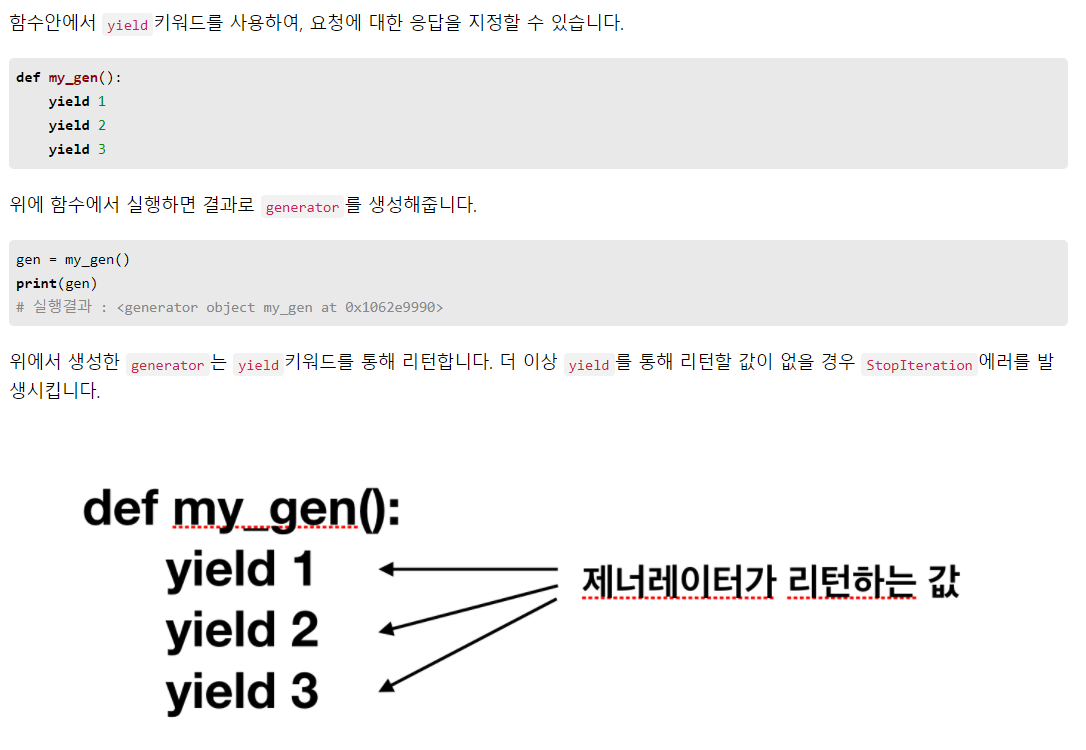
    - 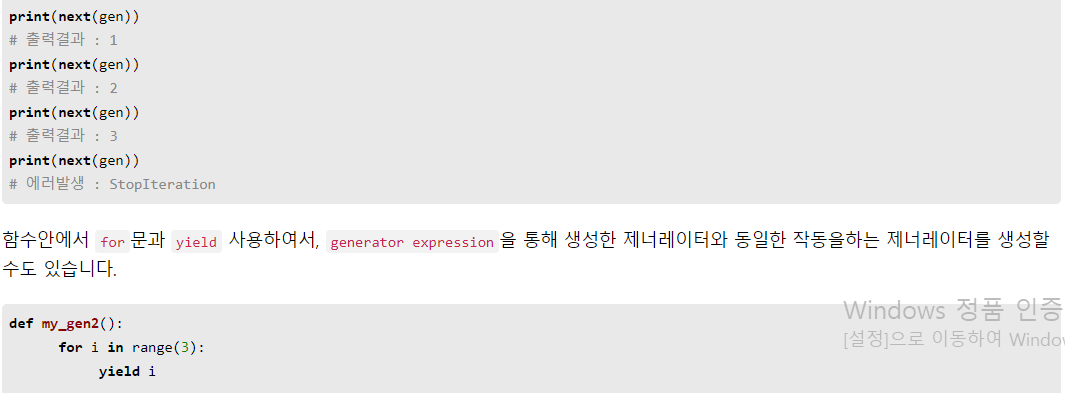

In [110]:
# generator 표현식을 포함한 예제

genexpr = ( x*x for x in range(3))
print_vector(*genexpr)

<0, 1, 4>


#### 딕셔너리 구조는 순서가 지정되지 않음

- 딕셔너리의 키를 기준으로 이름이 같은 인자와 해당 딕셔너리 값을 연결함
- x 인자는 딕셔너리의 'x' 와 연관된 값을 받음
- 그러나 * 로 함수를 주게 된다면, 키가 임의의 순서로 함수에 전달 ( 적혀 있는 순서 + key를 전달함 )

In [117]:
# dic 구조로 표현
dict_vec = {'y' : 0 , 'z' : 1, 'x' : 1}
print_vector(**dict_vec)
print_vector(*dict_vec)

<1, 0, 1>
<y, z, x>


#### keypoint ( 함수 인자 풀기 )
- ** 와 * 연산자는 데이터 및 딕셔너리를 함수 인자로 '푸는' 데 사용할 수 있음
- 인자 풀기를 효과적으로 사용하면 모듈과 함수의 인터페이스를 좀 더 유연하게 작성 가능

# 반환할 것이 없는 경우

- 파이썬은 함수의 끝에 암시적으로 return None 문을 추가함
- 함수가 반환 값을 지정하지 않으면 기본적으로 None이 반환됨
- 즉 return None 문을 아무것도 없는 return 문으로 대체하거나 심지어 완전히 없애더라도 동일한 결과를 얻음

In [119]:
def foo1(value):
    if value:
        return value
    else:
        return None

def foo2(value):
    """ return 문에 값이 생략돈 경우 'return None'을 의미함"""
    if value:
        return value
    else:
        return 

def foo3(value):
    """ return 문이 생략되어도 'return Npne'을 의미함"""
    if value:
        return value
  
print(type(foo1(0)))
print(type(foo2(0)))
print(type(foo3(0)))

<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>


#### 이 코드의 활용법
- 함수에 반환 값이 없는 경우 ( 다른 언어에서 '프리시저'라고 부름 ) return 문을 생략함
- 함수가 논리적인 관점에서 값을 반환하는 게 자연수럽다면 암시적 반환을 사용할지 여부를 결정해야함
    - ex) sum 이라는 함수는 한 번 더하고 말 것을 뜻하지 않음 논리적으로 연산에 추가적으로 사용될 수 있음으로 값을 반환받음

#### keypoint ( 반환문 )

- 함수가 반환값을 지정하지 않으면 None을 반환함. 명시적으로 return None을 쓸지는 취향
- 핵심적인 파이썬 기능이지만 명시적 return None 문을 써서 코드의 의도를 좀 더 명확하게 전달할 수 있음